# [벽부수고 이동하기](https://www.acmicpc.net/problem/2206)
  
  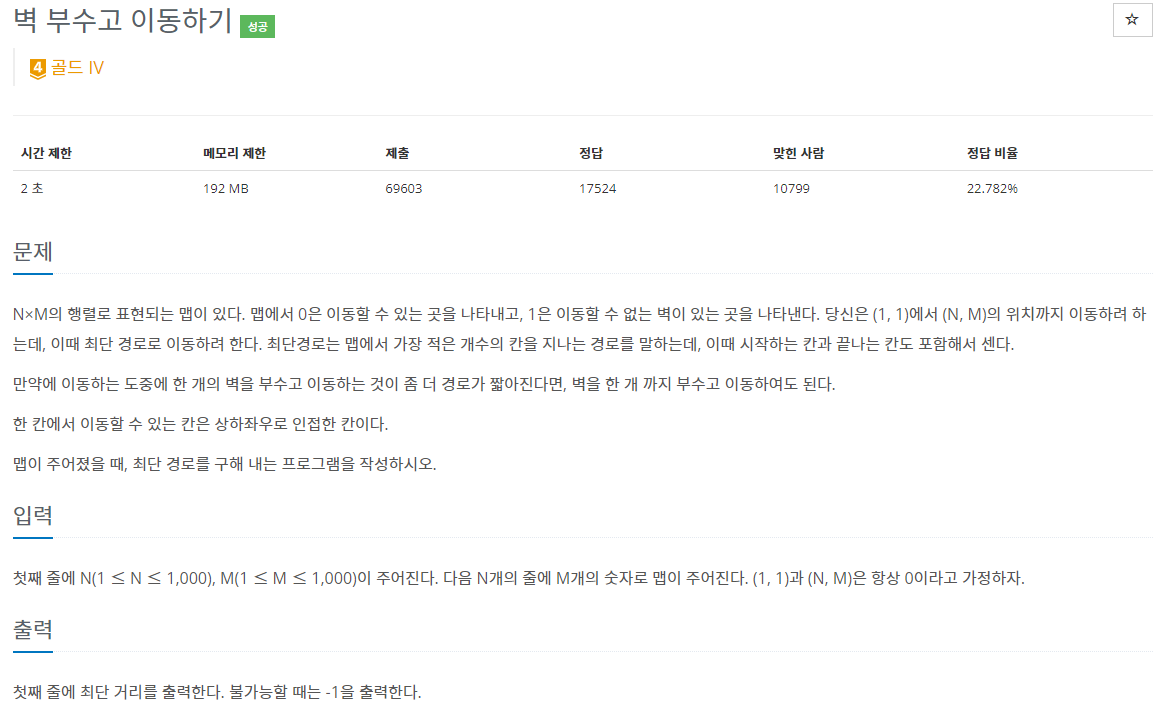

<!-- ![](image/2206.png) -->
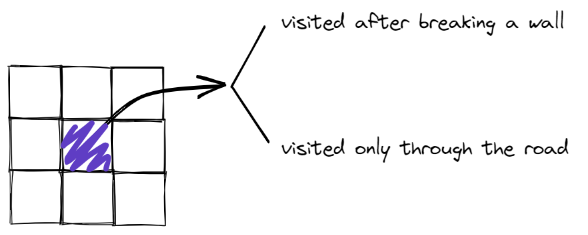

In [ ]:
import sys
from collections import deque

In [ ]:
def bfs():
    while q:
        (x, y), broken, cnt = q.popleft()
        if x == n-1 and y == m-1:
            return cnt
        for i in range(len(dx)):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0 <= nx < n and 0 <= ny < m:
                if graph[nx][ny] == 0 and not visited[nx][ny][0]: # 벽이 없는 곳
                    if broken and not visited[nx][ny][1]: #이미 이전에 벽을 부수고 왔다면 
                        visited[nx][ny][1] = True # 벽을 부수고 방문한 곳임을 표시
                        q.append(((nx, ny), True, cnt+1))
                    elif not broken and not visited[nx][ny][0]: # 이전에 벽을 부수지 않았다면
                        visited[nx][ny][0] = True # 벽을 부수지 않고 방문한 곳임을 표시
                        q.append(((nx, ny), False, cnt+1))
                if graph[nx][ny] == 1 and not broken and not visited[nx][ny][1]: # 벽이 있고 아직 벽을 부수지 않은 상태라면
                    visited[nx][ny][1] = True
                    q.append(((nx, ny), True, cnt+1))
    return -1

In [ ]:
input = sys.stdin.readline

dx = [0, -1, 0, 1]
dy = [1, 0, -1, 0]
q = deque()
n, m = map(int, input().split())
graph = [list(map(int, list(input().rstrip()))) for _ in range(n)]
visited = [[[False, False] for _ in range(m)] for _ in range(n)] # [벽을 부수지 않고 방문, 벽을 부수고 방문]

visited[0][0][0] = True
q.append(((0, 0), False, 1))
print(bfs())